In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

path = "C:/Users/Legion/OneDrive - Universidade de Aveiro/Universidade/4_ano/1_semestre/SemEC/springer-link-scraper/"
df = pd.read_excel(path + "springer_link_information.xlsx", index_col=0)

In [2]:
df

,article_type,title,link,abstract,author,date,year,n_citations,discipline
0,Article,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health
1,Article,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health
2,Article,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health
3,Article,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health
4,Article,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health
...,...,...,...,...,...,...,...,...,...
782,Article,Die Notwendigkeit einer Pflege naturwissenscha...,https://link.springer.com/article/10.1007/BF00...,NaN,Werner Kroebel,1963-01,1963,NaN,Life Sciences
783,Article,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences
784,Article,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance
785,Article,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History


In [3]:
df.shape

(787, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   article_type  787 non-null    object 
 1   title         787 non-null    object 
 2   link          787 non-null    object 
 3   abstract      766 non-null    object 
 4   author        776 non-null    object 
 5   date          787 non-null    object 
 6   year          787 non-null    int64  
 7   n_citations   720 non-null    float64
 8   discipline    787 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 61.5+ KB


In [5]:
data = df[df['abstract'].notna()]

In [6]:
data.groupby("article_type").article_type.count()

article_type
Article    766
Name: article_type, dtype: int64

In [7]:
data.reset_index(drop=True, inplace=True)
data

,article_type,title,link,abstract,author,date,year,n_citations,discipline
0,Article,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health
1,Article,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health
2,Article,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health
3,Article,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health
4,Article,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health
...,...,...,...,...,...,...,...,...,...
761,Article,Die Beziehung zwischen Nahrungsaufwand und kör...,https://link.springer.com/article/10.1007/BF01...,"1)Sitzungsber. d. Bayer. Akad. d. Wiss. 1885, ...",Max Rubner,1927-03,1927,2.0,Life Sciences
762,Article,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences
763,Article,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance
764,Article,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History


## abstracts that contain the words online or sports or bettting

In [8]:
from nltk.corpus import wordnet~
from nltk.tokenize import RegexpTokenizer

In [9]:
list_of_words = ["sports", "betting"]
synonyms = []

for word in list_of_words:
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
synonyms = list(set(synonyms))
synonyms

['romp',
 'frisk',
 'reckon',
 'lark',
 'sportswoman',
 'sport',
 'depend',
 'count',
 'dissipated',
 'variation',
 'run_around',
 'cavort',
 'betting',
 'skylark',
 'fun',
 'frolic',
 'calculate',
 'play',
 'bet',
 'athletics',
 'look',
 'card-playing',
 'feature',
 'disport',
 'rollick',
 'mutation',
 'lark_about',
 'wager',
 'sporting',
 'boast',
 'summercater',
 'gambol',
 'sportsman',
 'mutant']

In [10]:
l = []
for i, abstract in enumerate(data["abstract"].values):
    for word in synonyms:
        if word in abstract:
            l.append(data.iloc[i].values)
            break
cleaned_data = pd.DataFrame(l, columns=data.columns)
cleaned_data

,article_type,title,link,abstract,author,date,year,n_citations,discipline
0,Article,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health
1,Article,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health
2,Article,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health
3,Article,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health
4,Article,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health
...,...,...,...,...,...,...,...,...,...
609,Article,A comparative study of different acceleration ...,https://link.springer.com/article/10.1186/s136...,"At present, there are many acceleration sensor...","Qixia Jia,Zengyin Yan,Yongyong Wang",2021-11-09,2021,NaN,Engineering
610,Article,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences
611,Article,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance
612,Article,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History


## To do

Estabelecer os primeiros resultados:
1. papers por ano
2. papers por área (disciplina)
3. Fazer emergir temáticas associadas a palavras pouco usuais e usadas com a frequência

In [11]:
data.groupby("year").year.count()

year
1927     1
1938     2
1985     1
1987     1
1988     6
1989     3
1990     4
1991     1
1992     6
1993     6
1994     2
1995     4
1996     8
1997     5
1998     4
1999     1
2000     6
2001     4
2002     6
2003     4
2004    12
2005    13
2006    18
2007    22
2008    20
2009    27
2010    30
2011    23
2012    31
2013    47
2014    47
2015    45
2016    39
2017    57
2018    52
2019    72
2020    61
2021    75
Name: year, dtype: int64

In [12]:
data["year"].unique()

array([2021, 2019, 2014, 2017, 2018, 2020, 2013, 2015, 2016, 1992, 2004,
       2012, 2002, 2011, 2001, 2008, 2007, 2000, 2010, 2009, 1989, 2006,
       1997, 1996, 1990, 2005, 1995, 1988, 1993, 1985, 1987, 1998, 1999,
       2003, 1991, 1938, 1994, 1927], dtype=int64)

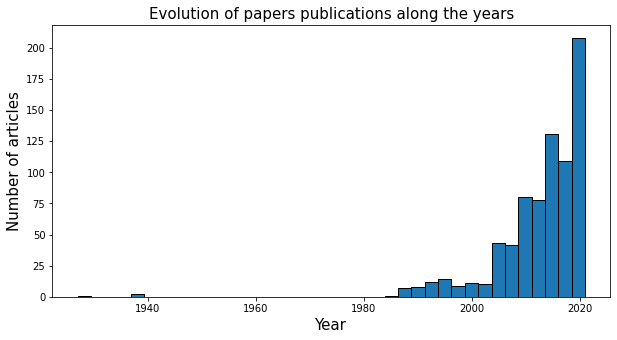

In [13]:
n_bins = len(data["year"].unique())
plt.figure(figsize=(10, 5))
plt.hist(data["year"], bins=n_bins, ec="black")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of articles", fontsize=15)
plt.title("Evolution of papers publications along the years", fontsize=15)
plt.show()

In [16]:
text = ""
for abstract in cleaned_data["abstract"].values:
    text += abstract + " "
tokens = [t for t in text.split()]
freqs = nltk.FreqDist(tokens)
blah_list = [(k, v) for k, v in freqs.items()]

In [21]:
sorted_blah_list = sorted(blah_list, key= lambda x: x[1], reverse=True)
sorted_blah_list

[('the', 5440),
 ('of', 5325),
 ('and', 5067),
 ('to', 3153),
 ('gambling', 2842),
 ('in', 2529),
 ('a', 2040),
 ('that', 1169),
 ('for', 1154),
 ('with', 1065),
 ('on', 1028),
 ('The', 958),
 ('were', 917),
 ('is', 906),
 ('as', 876),
 ('was', 716),
 ('problem', 704),
 ('are', 690),
 ('from', 515),
 ('be', 510),
 ('gamblers', 505),
 ('study', 489),
 ('by', 485),
 ('sports', 469),
 ('this', 468),
 ('between', 460),
 ('more', 454),
 ('or', 432),
 ('their', 432),
 ('an', 418),
 ('have', 412),
 ('betting', 364),
 ('This', 358),
 ('=', 346),
 ('online', 325),
 ('at', 314),
 ('gambling.', 307),
 ('has', 301),
 ('research', 279),
 ('these', 278),
 ('which', 276),
 ('than', 275),
 ('among', 273),
 ('not', 268),
 ('who', 267),
 ('In', 262),
 ('Gambling', 257),
 ('risk', 250),
 ('associated', 240),
 ('gambling,', 224),
 ('social', 222),
 ('other', 213),
 ('A', 205),
 ('results', 200),
 ('data', 195),
 ('been', 193),
 ('also', 193),
 ('can', 193),
 ('they', 186),
 ('we', 186),
 ('about', 183),
 